In [106]:
import pandas as pd
df = pd.read_csv("../genres_v2M.csv")

display(df)
print(df.columns)

C:\Users\96653\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,0.409704,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,5.311626,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-17.250003,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,1.453015,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,0.173787,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,6.190635,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,0.428377,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,0.634543,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,0.615231,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')


In [107]:
# Part 2.a
df.drop(["uri","id", "track_href","analysis_url","Unnamed: 0"],inplace=True, axis = 1)
fields = pd.DataFrame(data = [df[c].dtype for c in df.columns], index = [df.columns], columns = ["Type"])
display(fields)
display(df)

,Type
danceability,float64
energy,float64
key,int64
loudness,float64
mode,int64
speechiness,float64
acousticness,float64
instrumentalness,float64
liveness,float64
valence,float64


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,0.409704,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde,NaN
1,0.719,0.493,8,5.311626,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology,NaN
2,0.850,0.893,5,-17.250003,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote,NaN
3,0.476,0.781,0,1.453015,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN
4,0.798,0.624,2,0.173787,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,6.190635,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269208,4,hardstyle,NaN,Euphoric Hardstyle
42301,0.517,0.768,0,0.428377,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210112,4,hardstyle,NaN,Greatest Hardstyle Playlist
42302,0.361,0.821,8,0.634543,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234823,4,hardstyle,NaN,Best of Hardstyle 2020
42303,0.477,0.921,6,0.615231,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323200,4,hardstyle,NaN,Euphoric Hardstyle


In [108]:
# Part 2.b

null_columns=df.columns[df.isna().any()]
print('Columns with NaN values are:', null_columns.tolist())

for c in null_columns:
    if df[c].dtype!='object':
        value = df[c].mean()
    else:
        value = df[c].mode()
        value = value[0]  
    df[c].fillna(value,inplace=True)

display(df)

Columns with NaN values are: ['song_name', 'title']


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name,title
0,0.831,0.814,2,0.409704,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,audio_features,124539,4,Dark Trap,Mercury: Retrograde,Euphoric Hardstyle
1,0.719,0.493,8,5.311626,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,audio_features,224427,4,Dark Trap,Pathology,Euphoric Hardstyle
2,0.850,0.893,5,-17.250003,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,audio_features,98821,4,Dark Trap,Symbiote,Euphoric Hardstyle
3,0.476,0.781,0,1.453015,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,audio_features,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),Euphoric Hardstyle
4,0.798,0.624,2,0.173787,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,audio_features,123298,4,Dark Trap,Venom,Euphoric Hardstyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,6.190635,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,audio_features,269208,4,hardstyle,Forever,Euphoric Hardstyle
42301,0.517,0.768,0,0.428377,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,audio_features,210112,4,hardstyle,Forever,Greatest Hardstyle Playlist
42302,0.361,0.821,8,0.634543,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,audio_features,234823,4,hardstyle,Forever,Best of Hardstyle 2020
42303,0.477,0.921,6,0.615231,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,audio_features,323200,4,hardstyle,Forever,Euphoric Hardstyle


(42305, 13)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'danceability'),
  Text(1, 0, 'energy'),
  Text(2, 0, 'key'),
  Text(3, 0, 'loudness'),
  Text(4, 0, 'mode'),
  Text(5, 0, 'speechiness'),
  Text(6, 0, 'acousticness'),
  Text(7, 0, 'instrumentalness'),
  Text(8, 0, 'liveness'),
  Text(9, 0, 'valence'),
  Text(10, 0, 'tempo'),
  Text(11, 0, 'duration_ms'),
  Text(12, 0, 'time_signature')])

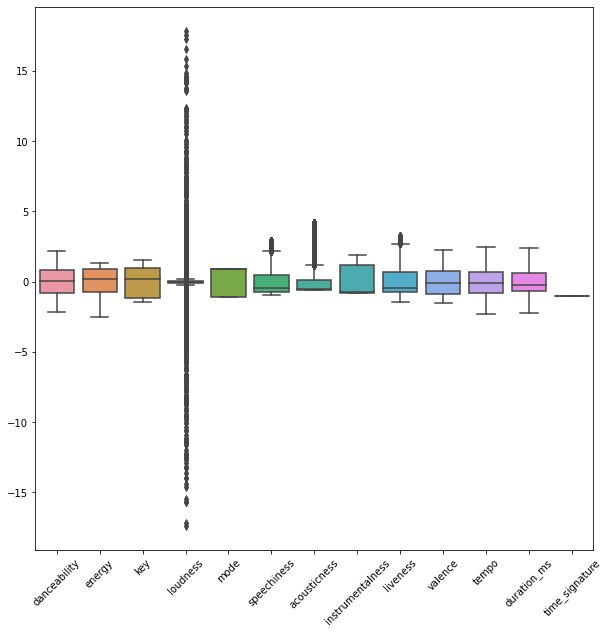

In [112]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

scaled_values = StandardScaler().fit_transform(df.select_dtypes(exclude="object"))

df2=pd.DataFrame(scaled_values,columns=df.select_dtypes(exclude="object").columns)
print(df2.shape)

threshold = 2

selected_rows= (df2<threshold).all(axis=1)  & (df2>-threshold).all(axis=1)
selected_index=df[~selected_rows].index
df2.drop(index=selected_index,inplace=True) # for analysis
ndf=df.drop(index=selected_index)  #     for interpretation
ndf.reset_index(inplace = True, drop = True) # to reset the index 
# Create the Scaler object
scaler = StandardScaler()

# Fit data on the scaler object
scaled_values=scaler.fit_transform(df2)
df2 = pd.DataFrame(scaled_values, columns=df.select_dtypes(exclude="object").columns)


import seaborn as sns 
plt.figure(figsize=(10,10))
sns.boxplot(data=df2)
plt.xticks(rotation=45)

In [110]:
display(df.corr())
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
danceability,1.000000,-0.323248,-0.012708,0.000806,0.084413,0.182177,0.069910,-0.067114,-0.196702,0.369845,-0.165929,-0.049807,0.057711
energy,-0.323248,1.000000,0.044731,-0.000328,-0.032203,-0.148363,-0.497334,0.303875,0.231754,-0.013520,-0.024504,0.294464,0.039781
key,-0.012708,0.044731,1.000000,0.003829,-0.248283,-0.030634,-0.004937,0.068266,0.002753,0.028600,-0.009862,0.069255,0.008061
loudness,0.000806,-0.000328,0.003829,1.000000,0.002649,-0.002292,-0.008086,-0.001945,-0.002892,-0.002803,-0.002995,-0.000870,0.000798
mode,0.084413,-0.032203,-0.248283,0.002649,1.000000,0.050260,-0.014514,-0.016402,0.007280,0.022208,-0.012191,-0.031253,-0.009317
speechiness,0.182177,-0.148363,-0.030634,-0.002292,0.050260,1.000000,0.160184,-0.386571,0.057432,0.218829,0.164674,-0.309892,0.021637
acousticness,0.069910,-0.497334,-0.004937,-0.008086,-0.014514,0.160184,1.000000,-0.261896,-0.107229,0.099328,0.055643,-0.246681,-0.049791
instrumentalness,-0.067114,0.303875,0.068266,-0.001945,-0.016402,-0.386571,-0.261896,1.000000,-0.015990,-0.257068,-0.207667,0.603784,-0.010164
liveness,-0.196702,0.231754,0.002753,-0.002892,0.007280,0.057432,-0.107229,-0.015990,1.000000,-0.025156,0.028327,0.010594,0.003077
valence,0.369845,-0.013520,0.028600,-0.002803,0.022208,0.218829,0.099328,-0.257068,-0.025156,1.000000,0.058374,-0.191093,0.040308
